<a href="https://colab.research.google.com/github/mrFahrenhiet/Fake-News-Detector/blob/master/facke_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from nltk.tokenize import RegexpTokenizer,WordPunctTokenizer,word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
df1 = pd.read_csv("/content/drive/My Drive/Dataset/Fake.csv")
df2 = pd.read_csv("/content/drive/My Drive/Dataset/True.csv")
df2

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [0]:
df1['text'] = df1['title']+df1['text']+df1['subject']
df1 = df1.drop(['title','subject','date'],axis=1)
df1.shape

(23481, 1)

In [0]:
df2['text'] = df2['title']+df2['text']+df2['subject']
df2 = df2.drop(['title','subject','date'],axis=1)
df2

,text
0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...
...,...
21412,'Fully committed' NATO backs new U.S. approach...
21413,LexisNexis withdrew two products from Chinese ...
21414,Minsk cultural hub becomes haven from authorit...
21415,Vatican upbeat on possibility of Pope Francis ...


In [0]:
y1 = np.zeros((df1.shape[0],))
y2 = np.ones((df2.shape[0],))
y2

array([1., 1., 1., ..., 1., 1., 1.])

In [0]:
frames = [df1,df2]
res = pd.concat(frames)

In [0]:
res.shape

(44898, 1)

In [0]:
Y = np.hstack((y1,y2))
Y.shape

(44898,)

In [0]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

In [0]:
res.tail(5)

,text
21412,'Fully committed' NATO backs new U.S. approach...
21413,LexisNexis withdrew two products from Chinese ...
21414,Minsk cultural hub becomes haven from authorit...
21415,Vatican upbeat on possibility of Pope Francis ...
21416,Indonesia to buy $1.14 billion worth of Russia...


In [0]:
X = res.values

In [0]:
X.shape

(44898, 1)

In [0]:
X = X.reshape(-1,)
X.shape

(44898,)

In [0]:
ps = PorterStemmer()
sw = set(stopwords.words('english'))
sw.remove('not')
sw.remove('no')
def data_cleaner(text):
  text = text.lower()
  tokenizer = RegexpTokenizer('[A-z]+')
  word_list = tokenizer.tokenize(text)
  clean_list = [w for w in word_list if w not in sw]
  stemmed_list = [ps.stem(w) for w in clean_list]
  clean_text = ' '.join(stemmed_list)
  return clean_text

In [0]:
X_clean = [data_cleaner(sent) for sent in X]

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X_clean,Y)

In [0]:
cv = TfidfVectorizer()

In [0]:
X_vec = cv.fit_transform(X_clean)

In [0]:
mnb = MultinomialNB()

In [0]:
mnb.fit(X_vec,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
mnb.score(X_vec,Y)

0.9475032295425186

In [0]:
X_tvec = cv.transform(X_test)

In [0]:
mnb.score(X_tvec,Y_test)

0.946369710467706

In [0]:
pred = mnb.predict(X_tvec)

In [0]:
pred

array([1., 1., 0., ..., 1., 0., 1.])

In [0]:
Y_test

array([1., 1., 1., ..., 1., 0., 1.])

In [0]:
report = classification_report(Y_test,pred,target_names = ['0','1'])

In [0]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5809
           1       0.95      0.94      0.94      5416

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [0]:
cm = confusion_matrix(Y_test,pred)
print(cm)

[[5557  252]
 [ 350 5066]]


In [0]:
print("FOR TESTING DATA")
print("False Positive: ",cm[0,1])
print("False Negetive: ",cm[1,0])

FOR TESTING DATA
False Positive:  252
False Negetive:  350


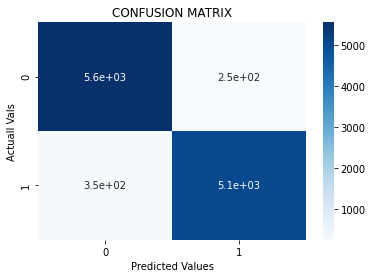

In [0]:
sns.heatmap(cm,xticklabels=[0,1],cmap=plt.cm.Blues,annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actuall Vals")
plt.title("CONFUSION MATRIX")
plt.show()